In [7]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from datetime import datetime

In [16]:
from src.utils import convierte_a_minusculas

In [17]:
pd.set_option('display.max_rows', 200)

In [2]:
#### Asisting configuration
sys.path.append("..")

In [257]:
df = pd.read_csv("../data/ds_challenge_apr2021.csv")

In [258]:
colores = ['#99C935','#EDAD08','#38A6A5','#ee4d5b', '#4169e1', '#00FFBF','#1C77A3FF']

### Limpieza base

In [259]:
df = df.rename(columns={'ID_USER':'id_user'})
df['fecha'] = pd.to_datetime(df['fecha'])

In [260]:
#df = convierte_a_minusculas(df)

In [261]:
df['fraude'] = df['fraude'].apply(lambda x: 'Si' if x==True else 'No')
df['is_prime'] = df['is_prime'].apply(lambda x: 'Si' if x==True else 'No')

In [262]:
df['genero'][df['genero']=='--']='no_def'

/Users/ele/.pyenv/versions/dpa_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [263]:
df=df.fillna('NA')

In [265]:
df.isna().sum()

id_user            0
genero             0
monto              0
fecha              0
hora               0
dispositivo        0
establecimiento    0
ciudad             0
tipo_tc            0
linea_tc           0
interes_tc         0
status_txn         0
is_prime           0
dcto               0
cashback           0
fraude             0
dtype: int64

# Categóricas vs montos

In [266]:
df['monto'].describe()

count    26975.000000
mean       499.069493
std        289.309518
min          0.017303
25%        246.521227
50%        500.501022
75%        749.598192
max        999.917764
Name: monto, dtype: float64

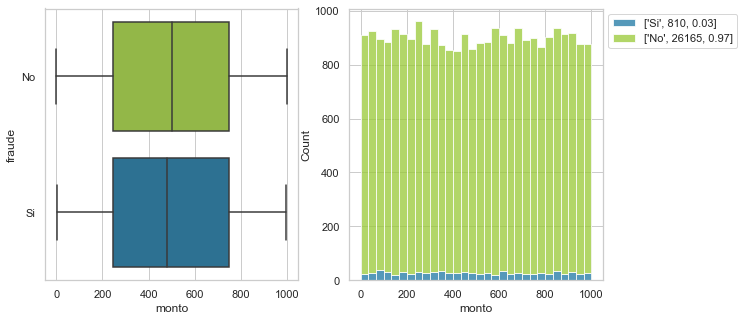

In [300]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

b=sns.boxplot(data=df,x='monto',y='fraude',
           palette=sns.blend_palette(colores, 2), ax=axs[0])

a=sns.histplot(df,x='monto',hue='fraude',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[1])

plt.legend(labels=[['Si',df['fraude'].value_counts()[1],
                    round(df['fraude'].value_counts(normalize=True)[1],2)],
           ['No',df['fraude'].value_counts()[0],
                   round(df['fraude'].value_counts(normalize=True)[0],2)]],bbox_to_anchor=(1, 1))

plt.show()

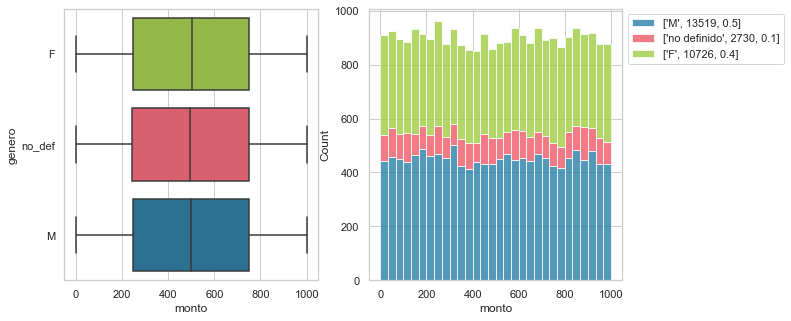

In [268]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

a=sns.boxplot(data=df,x='monto',y='genero',
           palette=sns.blend_palette(colores, 3), ax=axs[0])

b=sns.histplot(df,x='monto',hue='genero',multiple='stack',
             palette=sns.blend_palette(colores, 3), ax=axs[1])#,legend=False)

plt.legend(labels=[['M',df['genero'].value_counts()[0],
                    round(df['genero'].value_counts(normalize=True)[0],2)],
                   ['no definido',df['genero'].value_counts()[2],
                    round(df['genero'].value_counts(normalize=True)[2],2)],
                    ['F',df['genero'].value_counts()[1],
                    round(df['genero'].value_counts(normalize=True)[1],2)]],
           bbox_to_anchor=(1, 1) )

plt.show()

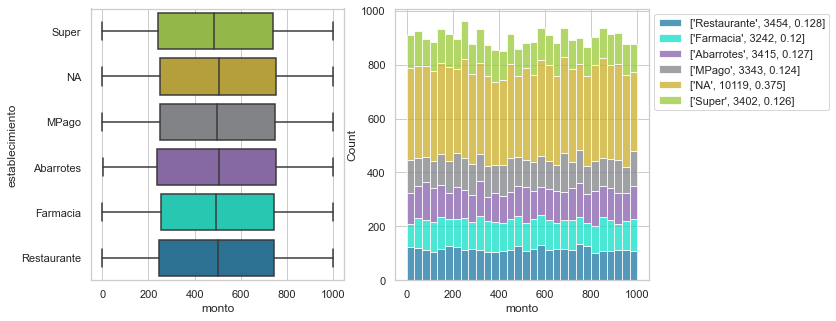

In [284]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

a=sns.boxplot(data=df,x='monto',y='establecimiento',
           palette=sns.blend_palette(colores, 6), ax=axs[0])

b=sns.histplot(df,x='monto',hue='establecimiento',multiple='stack',
             palette=sns.blend_palette(colores, 6), ax=axs[1],legend=True)

plt.legend(labels=[['Restaurante',df['establecimiento'].value_counts()[1],
                    round(df['establecimiento'].value_counts(normalize=True)[1],3)],
                   ['Farmacia',df['establecimiento'].value_counts()[5],
                    round(df['establecimiento'].value_counts(normalize=True)[5],3)],
                    ['Abarrotes',df['establecimiento'].value_counts()[2],
                    round(df['establecimiento'].value_counts(normalize=True)[2],3)],
                  ['MPago',df['establecimiento'].value_counts()[4],
                    round(df['establecimiento'].value_counts(normalize=True)[4],3)],
                   ['NA',df['establecimiento'].value_counts()[0],
                    round(df['establecimiento'].value_counts(normalize=True)[0],3)],
                   ['Super',df['establecimiento'].value_counts()[3],
                    round(df['establecimiento'].value_counts(normalize=True)[3],3)]],
           bbox_to_anchor=(1, 1))
plt.show()

In [286]:
df['ciudad'].value_counts(normalize=True)

NA             0.432919
Toluca         0.148174
Guadalajara    0.142095
Merida         0.139425
Monterrey      0.137386
Name: ciudad, dtype: float64

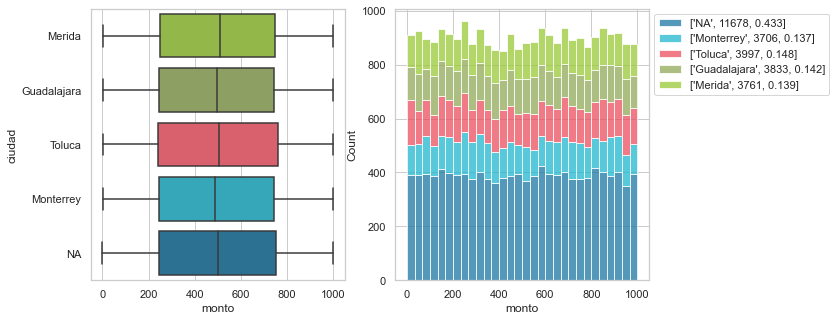

In [288]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

a=sns.boxplot(data=df,x='monto',y='ciudad',
           palette=sns.blend_palette(colores, 5), ax=axs[0])

b=sns.histplot(df,x='monto',hue='ciudad',multiple='stack',
             palette=sns.blend_palette(colores, 5), ax=axs[1],legend=False)



plt.legend(labels=[['NA',df['ciudad'].value_counts()[0],
                    round(df['ciudad'].value_counts(normalize=True)[0],3)],
                    ['Monterrey',df['ciudad'].value_counts()[4],
                    round(df['ciudad'].value_counts(normalize=True)[4],3)],
                  ['Toluca',df['ciudad'].value_counts()[1],
                    round(df['ciudad'].value_counts(normalize=True)[1],3)],
                   ['Guadalajara',df['ciudad'].value_counts()[2],
                    round(df['ciudad'].value_counts(normalize=True)[2],3)],
                  ['Merida',df['ciudad'].value_counts()[3],
                    round(df['ciudad'].value_counts(normalize=True)[3],3)]],
           bbox_to_anchor=(1, 1))

plt.show()

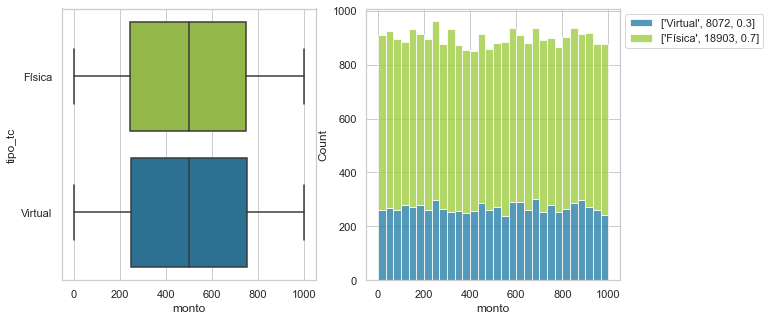

In [291]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

b=sns.boxplot(data=df,x='monto',y='tipo_tc',
           palette=sns.blend_palette(colores, 2), ax=axs[0])

a=sns.histplot(df,x='monto',hue='tipo_tc',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[1])

plt.legend(labels=[['Virtual',df['tipo_tc'].value_counts()[1],
                    round(df['tipo_tc'].value_counts(normalize=True)[1],2)],
           ['Física',df['tipo_tc'].value_counts()[0],
                   round(df['tipo_tc'].value_counts(normalize=True)[0],2)]],bbox_to_anchor=(1, 1))

plt.show()

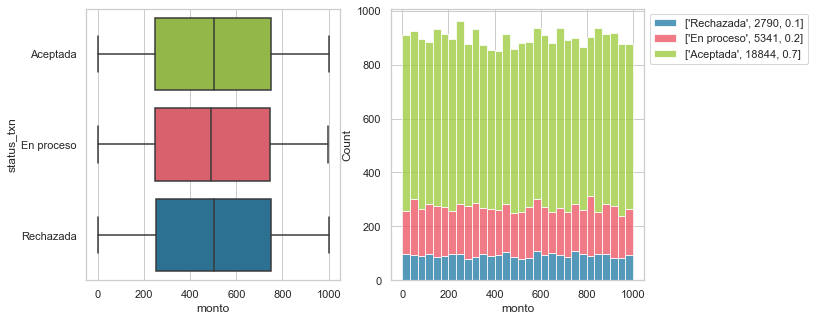

In [297]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

b=sns.boxplot(data=df,x='monto',y='status_txn',
           palette=sns.blend_palette(colores, 3), ax=axs[0])

a=sns.histplot(df,x='monto',hue='status_txn',multiple='stack',
             palette=sns.blend_palette(colores,3), ax=axs[1])

plt.legend(labels=[['Rechazada',df['status_txn'].value_counts()[2],
                    round(df['status_txn'].value_counts(normalize=True)[2],2)],
                   ['En proceso',df['status_txn'].value_counts()[1],
                    round(df['status_txn'].value_counts(normalize=True)[1],2)],
                    ['Aceptada',df['status_txn'].value_counts()[0],
                    round(df['status_txn'].value_counts(normalize=True)[0],2)]],
           bbox_to_anchor=(1, 1) )

plt.show()

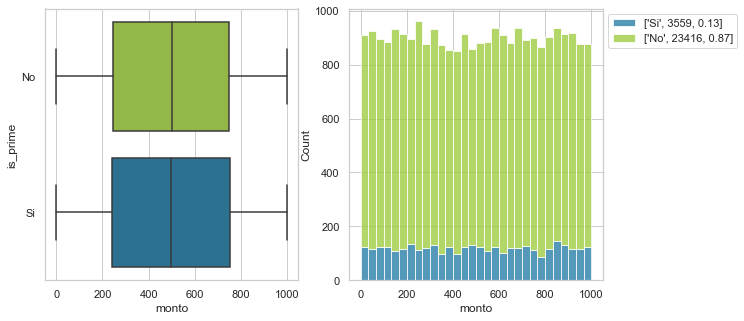

In [298]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

b=sns.boxplot(data=df,x='monto',y='is_prime',
           palette=sns.blend_palette(colores, 2), ax=axs[0])

a=sns.histplot(df,x='monto',hue='is_prime',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[1])

plt.legend(labels=[['Si',df['is_prime'].value_counts()[1],
                    round(df['is_prime'].value_counts(normalize=True)[1],2)],
           ['No',df['is_prime'].value_counts()[0],
                   round(df['is_prime'].value_counts(normalize=True)[0],2)]],bbox_to_anchor=(1, 1))

plt.show()

# Numéricas

''

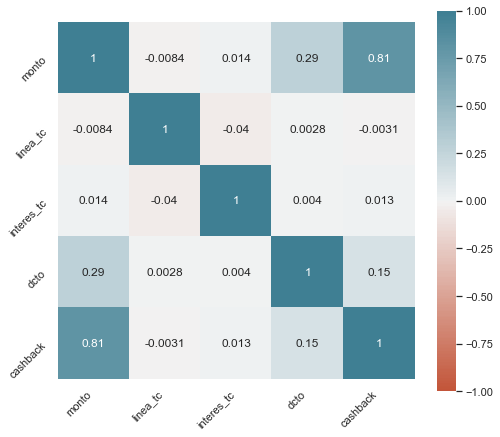

In [412]:
numericas = df[(['monto','linea_tc','interes_tc','dcto','cashback'])]
corr = numericas.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right'
)
;

In [490]:
df_no_fraude=df[df['fraude']=='No']
df_si_fraude=df[df['fraude']=='Si']

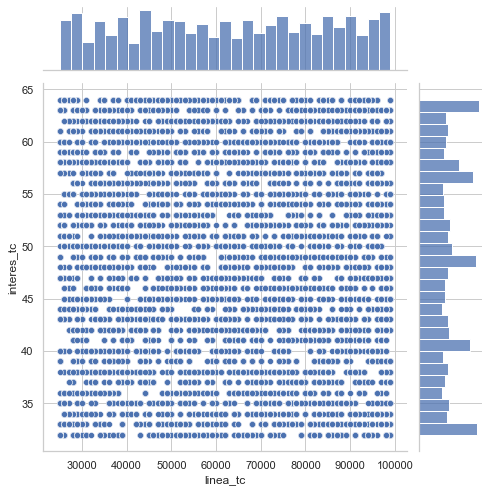

In [500]:
a=sns.jointplot(data=df_no_fraude, x="linea_tc", y="interes_tc", height=7,
                palette=sns.blend_palette(colores, 2))
# no hay diferencia entre fraude y no fraude

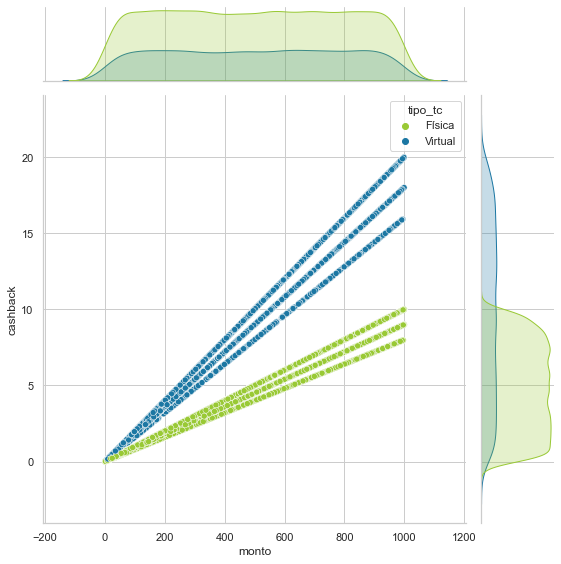

In [501]:
a=sns.jointplot(data=df_no_fraude, x="monto", y="cashback", height=8, hue='tipo_tc',
                palette=sns.blend_palette(colores, 2))
# no hay diferencia entre fraude y no fraude

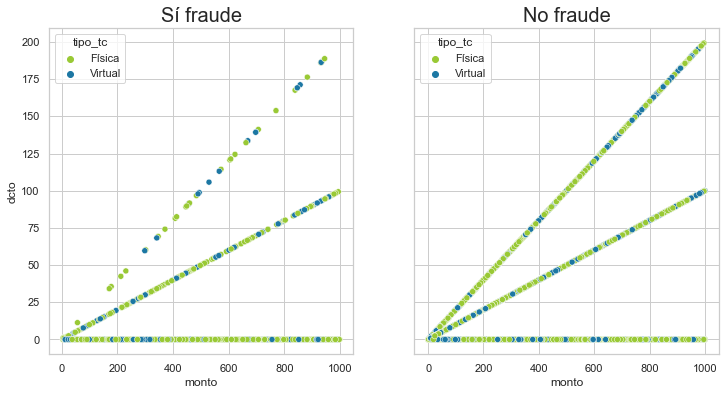

In [502]:
sns.set(style='whitegrid',rc={'figure.figsize':(12,6)})

fig, axs = plt.subplots(ncols=2,sharey=True)

a=sns.scatterplot(data=df_si_fraude,x='monto',y='dcto',hue='tipo_tc',
                  palette=sns.blend_palette(colores, 2),
                  ax=axs[0]).set_title("Sí fraude",size=20)

b=sns.scatterplot(data=df_no_fraude,x='monto',y='dcto',hue='tipo_tc',
                  palette=sns.blend_palette(colores, 2),
                  ax=axs[1]).set_title("No fraude",size=20)

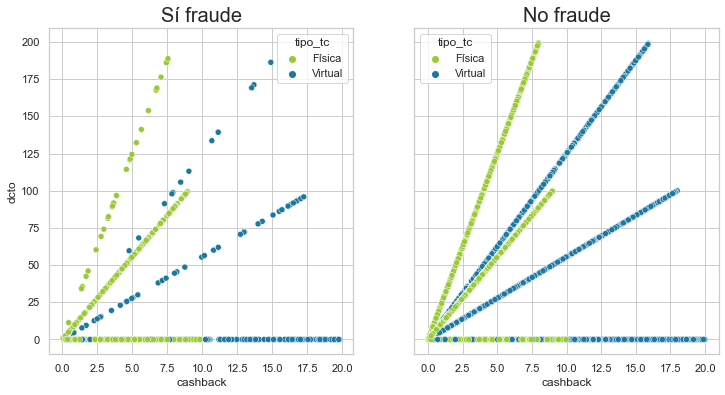

In [503]:
fig, axs = plt.subplots(ncols=2,sharey=True)

a=sns.scatterplot(data=df_si_fraude,x='cashback',y='dcto',hue='tipo_tc',
                  palette=sns.blend_palette(colores, 2),
                  ax=axs[0]).set_title("Sí fraude",size=20)

b=sns.scatterplot(data=df_no_fraude,x='cashback',y='dcto',hue='tipo_tc',
                  palette=sns.blend_palette(colores, 2),
                  ax=axs[1]).set_title("No fraude",size=20)

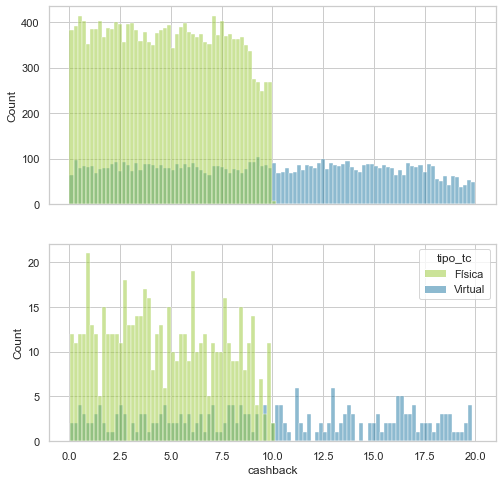

In [524]:
sns.set(style='whitegrid',rc={'figure.figsize':(8,8)})
fig, axs = plt.subplots(nrows=2,sharex=True)

a=sns.histplot(df_no_fraude,x='cashback',hue='tipo_tc',legend=False,#multiple='stack',
             palette=sns.blend_palette(colores, 2),bins=100,ax=axs[0])

a=sns.histplot(df_si_fraude,x='cashback',hue='tipo_tc',#multiple='stack',
             palette=sns.blend_palette(colores, 2),bins=100,ax=axs[1])

# Temporales